# Extra Trees (Extremely Randomized Trees)

Además de las modificaciones introducidas para Random Forest, una vez que se sortean los predictores que se utilizarán para un split, los cutpoints son también elegidos al azar, en vez de buscar aquel me minimice el criterio de costo.
Se evalúan todos los criterios para cada uno de los cutpoints elegidos al azar a en los predictores seleccionados, y se utiliza el mejor.

In [2]:
% load_ext autoreload
% autoreload 2
import helper_DT
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
def generate_gaussians(N0,N1,mu0,mu1,s):
    # N1: Cantidad de personas
    sigma=[[s,0],[0,s]]
    np.random.seed(231)
    X=np.vstack([np.random.multivariate_normal(mu0, sigma,N0),np.random.multivariate_normal(mu1, sigma,N1)])
    y=np.hstack([np.zeros(N0),np.ones(N1)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)
    return X_train, X_test, y_train, y_test

In [4]:
def gen_extra_tree(X_train, y_train, X_test, y_test,
             n_estimators=20,
             criterion="entropy",
             max_depth=None, 
             min_samples_split=2,
             min_samples_leaf=1,
             min_weight_fraction_leaf=0.,
             max_features=None,
             max_leaf_nodes=None,
             min_impurity_decrease=0.):
    clf = ExtraTreesClassifier(n_estimators=n_estimators,
                                     criterion=criterion,
                                     max_depth=max_depth,
                                     min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,
                                     min_weight_fraction_leaf=min_weight_fraction_leaf,
                                     max_features=max_features,
                                     max_leaf_nodes=max_leaf_nodes,
                                     min_impurity_decrease=min_impurity_decrease
                                     )
    clf = clf.fit(X_train, y_train)
    print("Train Score: {}".format(clf.score(X_train,y_train)))
    print("Test Score: {}".format(clf.score(X_test,y_test)))
    helper_DT.plotBoundaryDT(X_train,y_train,X_test,y_test,clf,N=500)

In [5]:
X_train, X_test, y_train, y_test=generate_gaussians(N0=1000,N1=1000,mu0=[2,5],mu1=[3,3],s=2)

Train Score: 1.0
Test Score: 0.7560606060606061


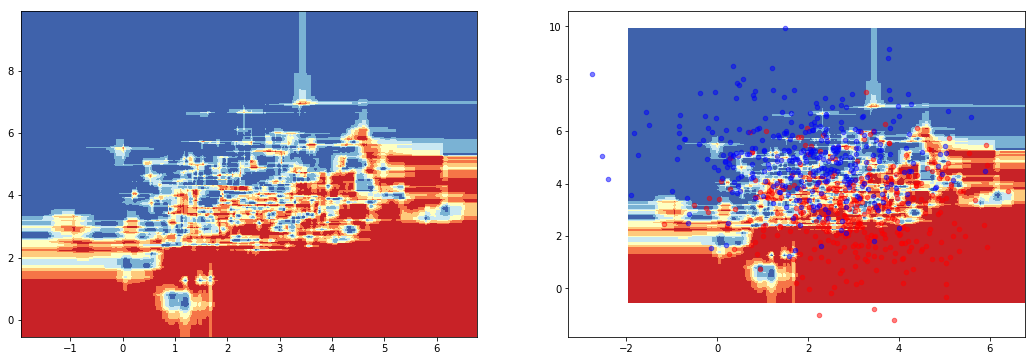

In [6]:
gen_extra_tree(X_train, y_train, X_test, y_test, n_estimators=20)

In [8]:
#Búsqueda de hiperparámetros
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['entropy', 'gini'], 
              'n_estimators': [10,30],
              'max_depth': [None, 30, 20, 10],
              'min_samples_split':[2,4,8],
              'min_samples_leaf':[1,2,4,8],
              'min_weight_fraction_leaf':[0.,0.01, 0.02],
              'max_features':[None,1],
              'max_leaf_nodes':[None,50,100],
              'min_impurity_decrease':[0.,0.05,0.1] 
            }
trees= ExtraTreesClassifier(bootstraping=True)
clf = GridSearchCV(trees, param_grid, cv=4,verbose=1,n_jobs=-1)
clf.fit(X_train,y_train)

Fitting 4 folds for each of 10368 candidates, totalling 41472 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 11226 tasks      

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=Fal...
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 30, 20, 10],
                         'max_features': [None, 1],
         

In [9]:
import pandas as pd
df=pd.DataFrame(clf.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_impurity_decrease,param_min_samples_leaf,...,param_min_weight_fraction_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.192638,0.059572,0.002738,0.000534,entropy,None,None,None,0,1,...,0,10,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.702381,0.752239,0.722388,0.730539,0.726866,0.017879,8317
1,0.129892,0.008900,0.006316,0.001673,entropy,None,None,None,0,1,...,0,30,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.720238,0.749254,0.740299,0.733533,0.735821,0.010598,7345
2,0.115679,0.008170,0.002088,0.000078,entropy,None,None,None,0,1,...,0.01,10,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.738095,0.794030,0.811940,0.799401,0.785821,0.028364,699
3,0.152902,0.049881,0.006202,0.003549,entropy,None,None,None,0,1,...,0.01,30,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.744048,0.800000,0.802985,0.790419,0.784328,0.023759,1064
4,0.120349,0.002903,0.001857,0.000070,entropy,None,None,None,0,1,...,0.02,10,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.735119,0.805970,0.791045,0.787425,0.779851,0.026794,2205


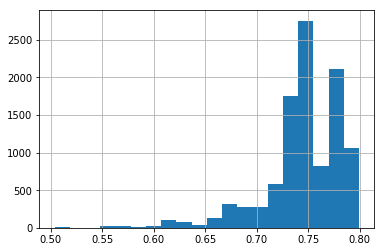

In [12]:
df["mean_test_score"].hist(bins=20)

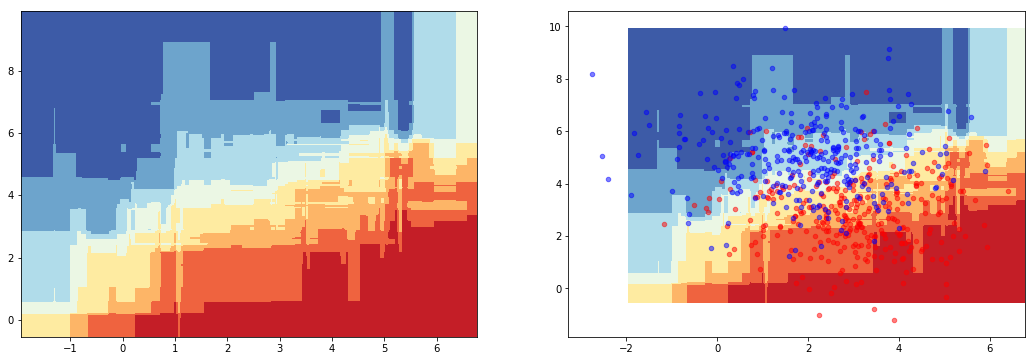

In [13]:
helper_DT.plotBoundaryDT(X_train,y_train,X_test,y_test,clf.best_estimator_,N=500)

In [14]:
clf.best_estimator_.feature_importances_

array([0.29396101, 0.70603899])